## Author: Bartosz Olechnowicz

# Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

import pickle
import json

In [2]:
df1 = pd.read_csv("all_perth_310121.csv")
df1.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


In [3]:
df1.shape

(33656, 19)

In [4]:
df2 = df1.drop(['NEAREST_STN','POSTCODE','LATITUDE','LONGITUDE', 'NEAREST_SCH', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK', 'ADDRESS', 'CBD_DIST', 'NEAREST_STN_DIST', 'DATE_SOLD'], axis='columns')

In [5]:
df2.head(10)

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR
0,South Lake,565000,4,2,2.0,600,160,2003.0
1,Wandi,365000,3,2,2.0,351,139,2013.0
2,Camillo,287000,3,1,1.0,719,86,1979.0
3,Bellevue,255000,2,1,2.0,651,59,1953.0
4,Lockridge,325000,4,1,2.0,466,131,1998.0
5,Mount Richon,409000,4,2,1.0,759,118,1991.0
6,Hilbert,400000,3,2,2.0,386,132,2014.0
7,Waikiki,370000,4,2,2.0,468,158,2013.0
8,Hamersley,565000,4,2,3.0,875,168,1983.0
9,Bayswater,685000,3,2,8.0,552,126,1999.0


# Data cleaning

In [6]:
df2.isnull().sum()

SUBURB           0
PRICE            0
BEDROOMS         0
BATHROOMS        0
GARAGE        2478
LAND_AREA        0
FLOOR_AREA       0
BUILD_YEAR    3155
dtype: int64

In [7]:
df2.shape

(33656, 8)

In [8]:
df3 = df2.dropna()
df3.isnull().sum()

SUBURB        0
PRICE         0
BEDROOMS      0
BATHROOMS     0
GARAGE        0
LAND_AREA     0
FLOOR_AREA    0
BUILD_YEAR    0
dtype: int64

In [9]:
df3.shape

(28256, 8)

In [10]:
df3['BEDROOMS'].value_counts()

4     14985
3      9679
5      2128
2      1087
6       250
1        65
7        43
8        15
9         3
10        1
Name: BEDROOMS, dtype: int64

In [11]:
df3[df3['BEDROOMS'] >= 9]

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR
5845,Mariginiup,1585000,10,5,2.0,20250,343,2005.0
6915,Bullsbrook,1500000,9,4,1.0,81448,371,1975.0
23013,Carmel,1500000,9,5,6.0,38500,460,1987.0
23046,Belmont,700000,9,7,2.0,655,250,1950.0


In [12]:
df3['BATHROOMS'].value_counts()

2     19001
1      7012
3      2012
4       201
5        23
6         5
7         1
16        1
Name: BATHROOMS, dtype: int64

In [13]:
df3[df3['BATHROOMS'] > 5]

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR
4828,Waterford,1438000,6,6,2.0,817,413,1996.0
15384,Mount Hawthorn,1600000,6,6,2.0,490,345,1940.0
16471,Coogee,1900000,6,6,5.0,705,627,2002.0
20455,Beaconsfield,810000,6,6,4.0,358,170,2010.0
23046,Belmont,700000,9,7,2.0,655,250,1950.0
27000,Gooseberry Hill,1525000,8,6,4.0,3078,357,1960.0
28425,Lockridge,300000,4,16,1.0,745,95,1977.0


In [14]:
df4 = df3[df3['BATHROOMS'] < 10]

In [15]:
df4['BATHROOMS'].value_counts()

2    19001
1     7012
3     2012
4      201
5       23
6        5
7        1
Name: BATHROOMS, dtype: int64

In [16]:
df4['SUBURB'].value_counts().sort_values(ascending=False)

Bertram          204
Henley Brook     198
Jane Brook       195
Merriwa          193
Mindarie         192
                ... 
Neerabup           6
Hope Valley        3
Munster            1
Kwinana Beach      1
Wangara            1
Name: SUBURB, Length: 317, dtype: int64

In [17]:
df4['GARAGE'].unique()

array([ 2.,  1.,  3.,  8.,  6.,  4.,  5.,  7.,  9., 10., 12., 32., 14.,
       16., 11., 13., 17., 18., 21., 20., 99., 26., 22., 50., 31.])

In [18]:
df4[df4['GARAGE'] > 5]

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR
9,Bayswater,685000,3,2,8.0,552,126,1999.0
10,Carmel,675000,4,2,6.0,2538,241,1977.0
48,Kensington,705000,3,1,6.0,774,132,1952.0
234,Parkerville,635000,3,1,6.0,20070,160,2001.0
252,Roleystone,670000,5,2,7.0,2783,284,2011.0
...,...,...,...,...,...,...,...,...
33505,Martin,500000,3,1,8.0,2023,190,1975.0
33510,Beeliar,950000,4,2,8.0,4068,189,1997.0
33536,Stoneville,649000,4,2,6.0,20012,201,2002.0
33549,Coolbinia,1430000,5,3,6.0,772,329,2008.0


In [19]:
df4[df4['GARAGE'] > df4['BEDROOMS']]

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR
9,Bayswater,685000,3,2,8.0,552,126,1999.0
10,Carmel,675000,4,2,6.0,2538,241,1977.0
18,Koongamia,318000,2,1,3.0,751,90,1959.0
40,Quinns Rocks,405000,3,2,4.0,781,156,1989.0
48,Kensington,705000,3,1,6.0,774,132,1952.0
...,...,...,...,...,...,...,...,...
33536,Stoneville,649000,4,2,6.0,20012,201,2002.0
33549,Coolbinia,1430000,5,3,6.0,772,329,2008.0
33567,Karnup,825000,4,2,5.0,20328,144,2003.0
33606,Guildford,765000,4,2,6.0,626,162,2009.0


In [20]:
df5 = df4[df4['GARAGE'] <= df4['BEDROOMS']]

In [21]:
df5.shape

(26723, 8)

In [22]:
df5['GARAGE'].unique()

array([2., 1., 3., 4., 6., 5.])

In [23]:
df5['FLOOR_AREA'].info()

<class 'pandas.core.series.Series'>
Int64Index: 26723 entries, 0 to 33654
Series name: FLOOR_AREA
Non-Null Count  Dtype
--------------  -----
26723 non-null  int64
dtypes: int64(1)
memory usage: 417.5 KB


In [24]:
df5['LAND_AREA'].info()

<class 'pandas.core.series.Series'>
Int64Index: 26723 entries, 0 to 33654
Series name: LAND_AREA
Non-Null Count  Dtype
--------------  -----
26723 non-null  int64
dtypes: int64(1)
memory usage: 417.5 KB


In [25]:
unique_years = ' '.join(map(str, sorted(df5['BUILD_YEAR'].unique())))
unique_years

'1868.0 1870.0 1880.0 1886.0 1890.0 1892.0 1894.0 1895.0 1897.0 1900.0 1901.0 1902.0 1903.0 1904.0 1905.0 1907.0 1908.0 1910.0 1912.0 1913.0 1914.0 1915.0 1916.0 1917.0 1918.0 1919.0 1920.0 1921.0 1922.0 1923.0 1924.0 1925.0 1926.0 1927.0 1928.0 1929.0 1930.0 1931.0 1932.0 1933.0 1934.0 1935.0 1936.0 1937.0 1938.0 1939.0 1940.0 1941.0 1942.0 1943.0 1945.0 1946.0 1947.0 1948.0 1949.0 1950.0 1951.0 1952.0 1953.0 1954.0 1955.0 1956.0 1957.0 1958.0 1959.0 1960.0 1961.0 1962.0 1963.0 1964.0 1965.0 1966.0 1967.0 1968.0 1969.0 1970.0 1971.0 1972.0 1973.0 1974.0 1975.0 1976.0 1977.0 1978.0 1979.0 1980.0 1981.0 1982.0 1983.0 1984.0 1985.0 1986.0 1987.0 1988.0 1989.0 1990.0 1991.0 1992.0 1993.0 1994.0 1995.0 1996.0 1997.0 1998.0 1999.0 2000.0 2001.0 2002.0 2003.0 2004.0 2005.0 2006.0 2007.0 2008.0 2009.0 2010.0 2011.0 2012.0 2013.0 2014.0 2015.0 2016.0 2017.0'

# Feature Engineering

In [26]:
df6 = df5.copy()

In [27]:
df6.head()

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR
0,South Lake,565000,4,2,2.0,600,160,2003.0
1,Wandi,365000,3,2,2.0,351,139,2013.0
2,Camillo,287000,3,1,1.0,719,86,1979.0
3,Bellevue,255000,2,1,2.0,651,59,1953.0
4,Lockridge,325000,4,1,2.0,466,131,1998.0


In [28]:
df6['PRICE_PER_SQFT'] = df6['PRICE']/(df6['LAND_AREA']+df6['FLOOR_AREA'])
df6.head()

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,PRICE_PER_SQFT
0,South Lake,565000,4,2,2.0,600,160,2003.0,743.421053
1,Wandi,365000,3,2,2.0,351,139,2013.0,744.897959
2,Camillo,287000,3,1,1.0,719,86,1979.0,356.521739
3,Bellevue,255000,2,1,2.0,651,59,1953.0,359.154930
4,Lockridge,325000,4,1,2.0,466,131,1998.0,544.388610


In [29]:
len(df6['SUBURB'].unique())

317

In [30]:
df6.location = df5.SUBURB.apply(lambda x: x.strip())

In [31]:
SUBURB_STATS = df5.groupby('SUBURB')['SUBURB'].agg('count').sort_values(ascending=False)
SUBURB_STATS.head(10)

SUBURB
Bertram           201
Mindarie          192
Jane Brook        190
Iluka             189
Merriwa           188
Henley Brook      187
Darch             182
Butler            174
Secret Harbour    168
Gwelup            167
Name: SUBURB, dtype: int64

In [32]:
len(SUBURB_STATS[SUBURB_STATS <= 10])

12

In [33]:
location_stats_less_than_10 = SUBURB_STATS[SUBURB_STATS <= 10]
location_stats_less_than_10

SUBURB
Wungong            10
Northbridge        10
East Perth          9
Carabooda           9
Neerabup            6
Keysbrook           6
Pickering Brook     5
O'Connor            5
Hope Valley         3
Wangara             1
Kwinana Beach       1
Munster             1
Name: SUBURB, dtype: int64

In [34]:
df6.SUBURB = df6.SUBURB.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [35]:
len(df6.SUBURB.unique())

306

In [36]:
df6.location.head(15)

0       South Lake
1            Wandi
2          Camillo
3         Bellevue
4        Lockridge
5     Mount Richon
6          Hilbert
7          Waikiki
8        Hamersley
11          Butler
12           Balga
13    Hammond Park
14    Wattle Grove
15      Bull Creek
16      Bullsbrook
Name: SUBURB, dtype: object

# Outlier Removal

In [37]:
df6.head()

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,PRICE_PER_SQFT
0,South Lake,565000,4,2,2.0,600,160,2003.0,743.421053
1,Wandi,365000,3,2,2.0,351,139,2013.0,744.897959
2,Camillo,287000,3,1,1.0,719,86,1979.0,356.521739
3,Bellevue,255000,2,1,2.0,651,59,1953.0,359.154930
4,Lockridge,325000,4,1,2.0,466,131,1998.0,544.388610


In [38]:
df6['PRICE_PER_SQFT'].describe()

count    26723.000000
mean       754.468903
std        501.839249
min          0.364938
25%        452.313992
50%        650.292398
75%        940.208493
max       5454.545455
Name: PRICE_PER_SQFT, dtype: float64

In [39]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('SUBURB'):
        m = np.mean(subdf.PRICE_PER_SQFT)
        st = np.std(subdf.PRICE_PER_SQFT)
        reduced_df = subdf[(subdf.PRICE_PER_SQFT > (m-st)) & (subdf.PRICE_PER_SQFT <= (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

In [40]:
df7 = remove_pps_outliers(df6)
df7.shape

(20011, 9)

In [41]:
df7.head()

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,PRICE_PER_SQFT
0,Alexander Heights,331500,3,1,2.0,403,109,1994.0,647.460938
1,Alexander Heights,430000,4,2,2.0,564,154,2001.0,598.885794
2,Alexander Heights,685000,5,3,2.0,699,361,1993.0,646.226415
3,Alexander Heights,440000,4,2,2.0,589,141,1993.0,602.739726
4,Alexander Heights,430000,4,2,2.0,450,209,2006.0,652.503794


In [42]:
df7['BEDROOMS'].value_counts()

4     11579
3      6121
5      1557
2       516
6       178
7        29
1        21
8         7
9         2
10        1
Name: BEDROOMS, dtype: int64

In [43]:
def plot_scatter_chart(df, SUBURB):
    room_2 = df[(df.SUBURB==SUBURB) & (df.BEDROOMS==2)]
    room_3 = df[(df.SUBURB==SUBURB) & (df.BEDROOMS==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(room_2.PRICE_PER_SQFT, room_2.PRICE, color = 'blue', label = 'Room 2', s = 50)
    plt.scatter(room_3.PRICE_PER_SQFT, room_3.PRICE, marker = '+', color = 'green', label = 'Room 3', s = 50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(SUBURB)
    plt.legend()

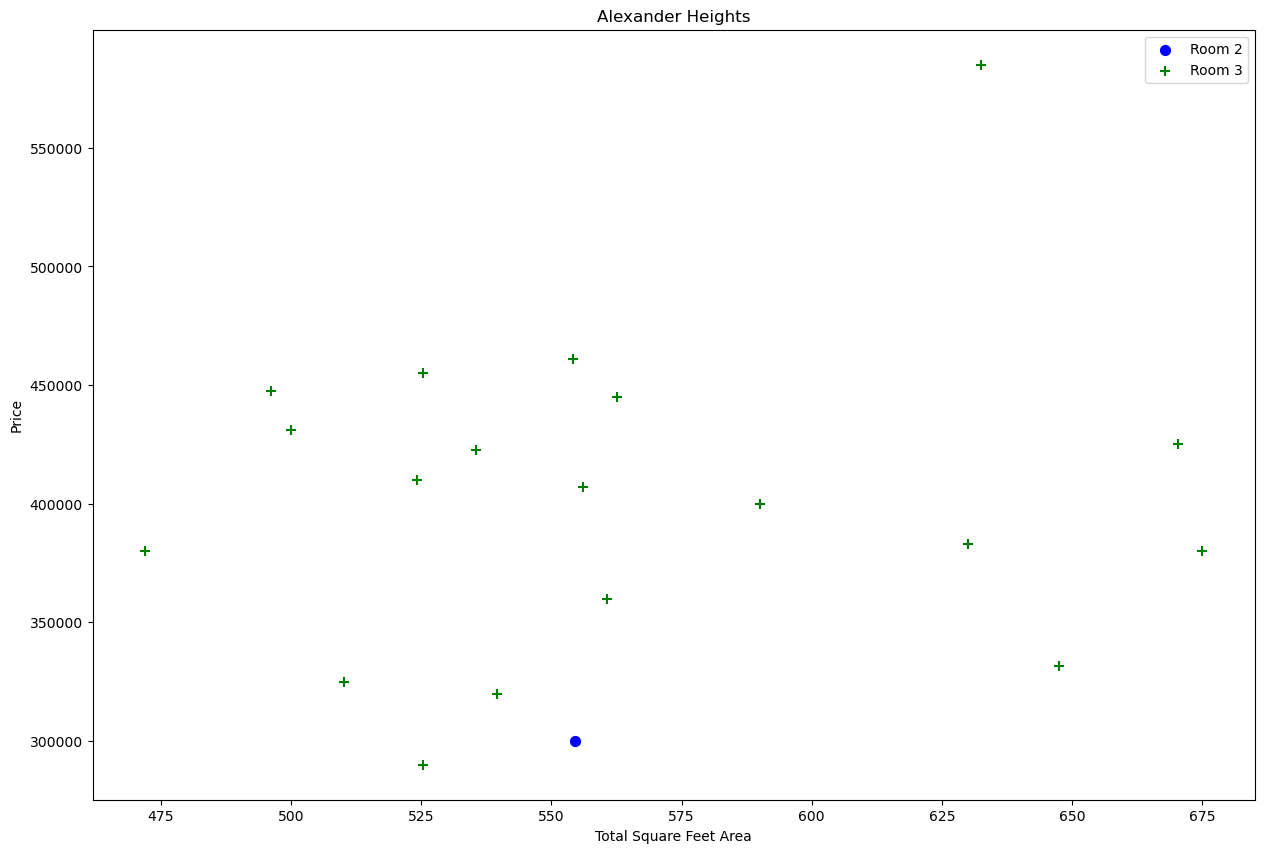

In [44]:
plot_scatter_chart(df7,"Alexander Heights")

In [45]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for SUBURB, SUBURB_df in df.groupby('SUBURB'):
        BEDROOMS_stats = {}
        for BEDROOMS, SUBURB_df in SUBURB_df.groupby('BEDROOMS'):
            BEDROOMS_stats[BEDROOMS] = {
                'mean': np.mean(SUBURB_df.PRICE_PER_SQFT),
                'std': np.std(SUBURB_df.PRICE_PER_SQFT),
                'count': SUBURB_df.shape[0]
            }
        for BEDROOMS, BEDROOMS_df in SUBURB_df.groupby('BEDROOMS'):
            stats = BEDROOMS_stats.get(BEDROOMS-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, BEDROOMS_df[BEDROOMS_df.PRICE_PER_SQFT<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [46]:
df8 = remove_bhk_outliers(df7)
df8.shape

(19486, 9)

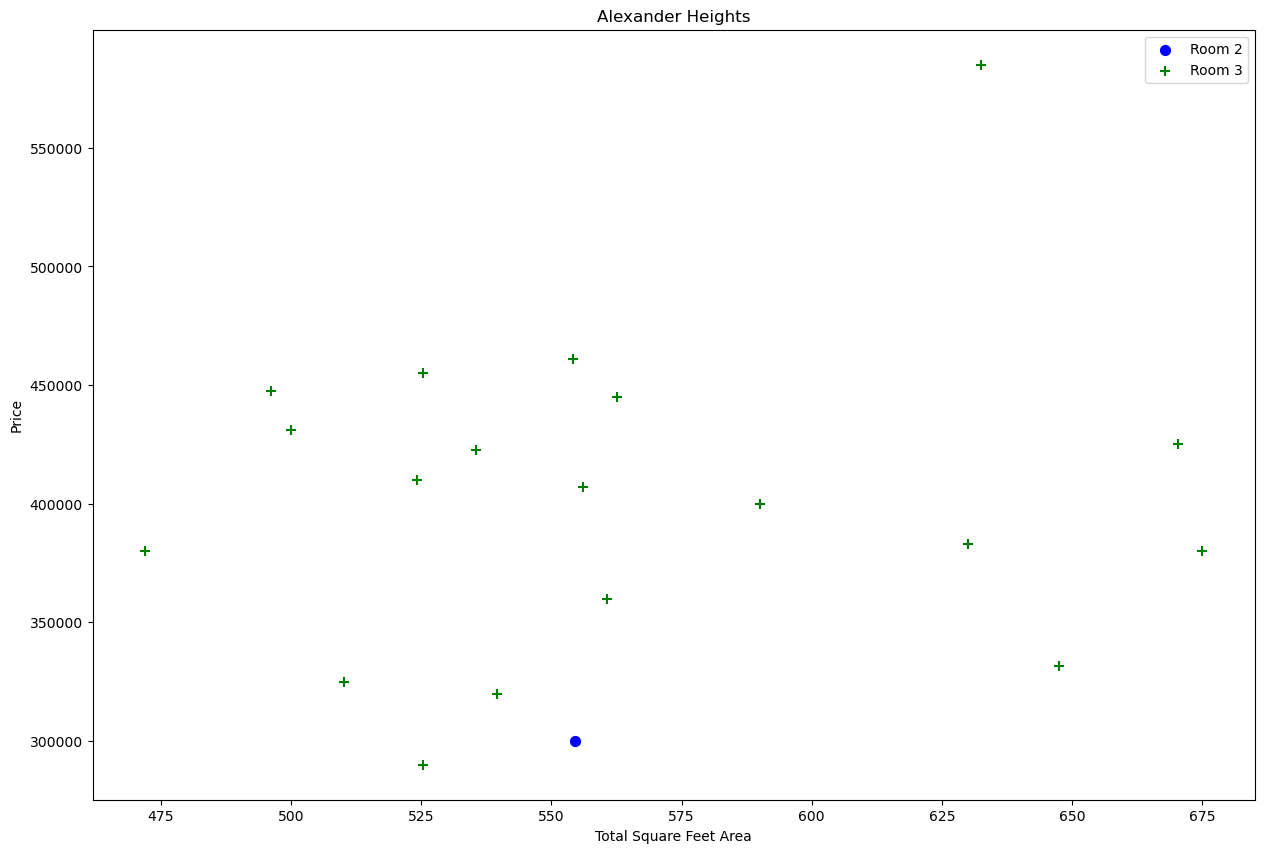

In [47]:
plot_scatter_chart(df7,"Alexander Heights")

Text(0, 0.5, 'Count')

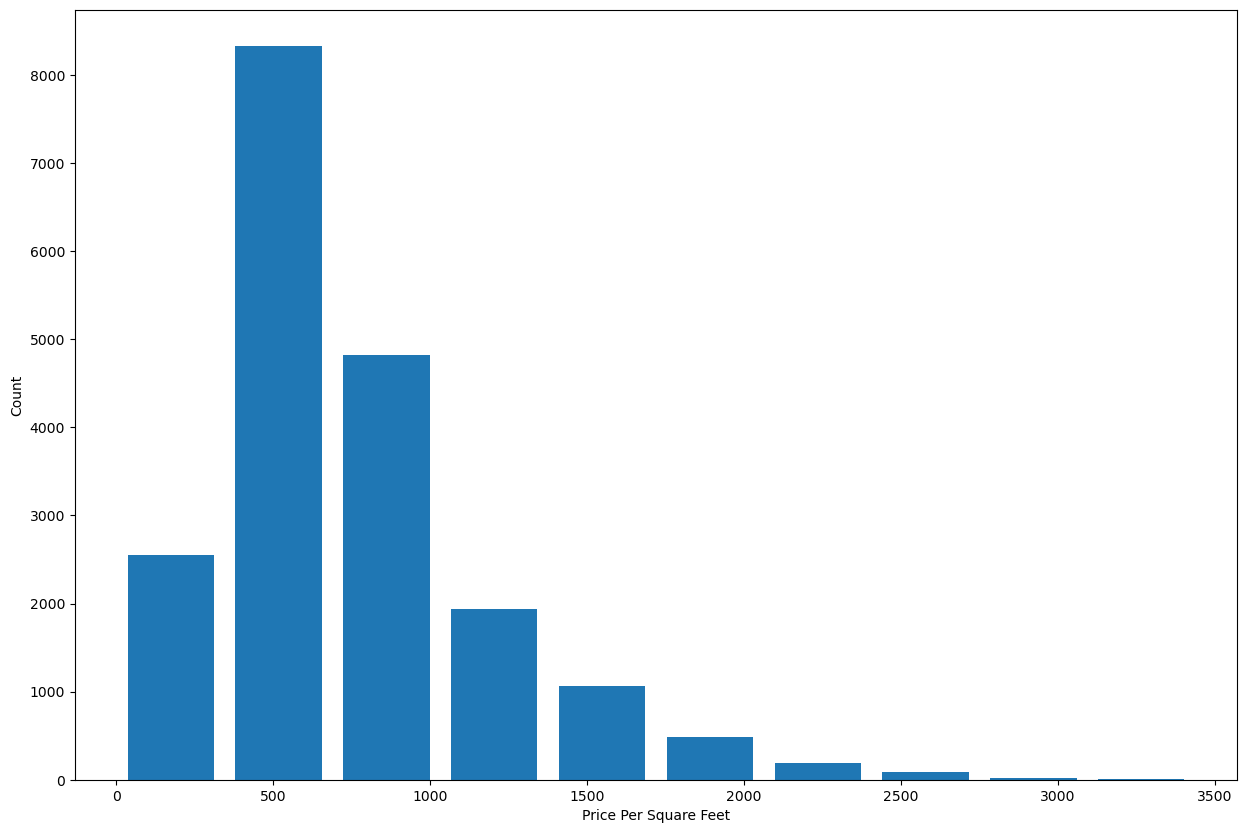

In [48]:
plt.hist(df8.PRICE_PER_SQFT,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [49]:
df9 = df8.drop(['PRICE_PER_SQFT'], axis='columns')

In [50]:
df9.head()

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR
0,Alexander Heights,331500,3,1,2.0,403,109,1994.0
1,Alexander Heights,430000,4,2,2.0,564,154,2001.0
2,Alexander Heights,685000,5,3,2.0,699,361,1993.0
3,Alexander Heights,440000,4,2,2.0,589,141,1993.0
4,Alexander Heights,430000,4,2,2.0,450,209,2006.0


In [51]:
df9.shape

(19486, 8)

# Model Building

## One Hot Encoding

In [52]:
dummies = pd.get_dummies(df9.SUBURB)
dummies.head(5)

,Alexander Heights,Alfred Cove,Alkimos,Anketell,Applecross,Ardross,Armadale,Ascot,Ashby,Ashfield,...,Wilson,Winthrop,Woodbridge,Woodlands,Woodvale,Wooroloo,Yanchep,Yangebup,Yokine,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df10 = pd.concat([df9, dummies.drop('other', axis='columns')], axis='columns')
df10.shape

(19486, 313)

In [54]:
df10.head(5)

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,Alexander Heights,Alfred Cove,...,Willetton,Wilson,Winthrop,Woodbridge,Woodlands,Woodvale,Wooroloo,Yanchep,Yangebup,Yokine
0,Alexander Heights,331500,3,1,2.0,403,109,1994.0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Alexander Heights,430000,4,2,2.0,564,154,2001.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Alexander Heights,685000,5,3,2.0,699,361,1993.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Alexander Heights,440000,4,2,2.0,589,141,1993.0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Alexander Heights,430000,4,2,2.0,450,209,2006.0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df11 = df10.drop(['SUBURB'], axis = 'columns')

In [56]:
df11.head()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,Alexander Heights,Alfred Cove,Alkimos,...,Willetton,Wilson,Winthrop,Woodbridge,Woodlands,Woodvale,Wooroloo,Yanchep,Yangebup,Yokine
0,331500,3,1,2.0,403,109,1994.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,430000,4,2,2.0,564,154,2001.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,685000,5,3,2.0,699,361,1993.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,440000,4,2,2.0,589,141,1993.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,430000,4,2,2.0,450,209,2006.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
X = df11.drop(['PRICE'], axis = 'columns')
X.head()

,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,Alexander Heights,Alfred Cove,Alkimos,Anketell,...,Willetton,Wilson,Winthrop,Woodbridge,Woodlands,Woodvale,Wooroloo,Yanchep,Yangebup,Yokine
0,3,1,2.0,403,109,1994.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,2,2.0,564,154,2001.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,3,2.0,699,361,1993.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2,2.0,589,141,1993.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2,2.0,450,209,2006.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
y = df11.PRICE
y.head(5)

0    331500
1    430000
2    685000
3    440000
4    430000
Name: PRICE, dtype: int64

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

## Linear Regression

In [60]:
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8177740782779067

## Cross validation

In [61]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.83740068, 0.82724864, 0.83376178, 0.83243225, 0.82543108])

## Finding best model using GridSearchCV

In [62]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True,False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [63]:
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.831255,{'fit_intercept': True}
1,lasso,0.831299,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.625230,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


## Testing the trained model

In [64]:
def predict_price(location,bedrooms,bathrooms,garage,land_area,floor_area, build_year):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bedrooms
    x[1] = bathrooms
    x[2] = garage
    x[3] = land_area
    x[4] = floor_area
    x[5] = build_year
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [65]:
X.columns

Index(['BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA',
       'BUILD_YEAR', 'Alexander Heights', 'Alfred Cove', 'Alkimos', 'Anketell',
       ...
       'Willetton', 'Wilson', 'Winthrop', 'Woodbridge', 'Woodlands',
       'Woodvale', 'Wooroloo', 'Yanchep', 'Yangebup', 'Yokine'],
      dtype='object', length=311)

In [66]:
predict_price('Alexander Heights', 5, 3, 2, 700, 360, 2000)

840607.1204053601

In [67]:
predict_price('Woodlands', 4, 3, 4, 700, 260, 1980)

1275664.5727863251

# Exporting prepared model

In [68]:
with open('Perth House Price Prediction.pickle','wb') as f:
    pickle.dump(lr_clf,f)

# Exporting location and column information

In [69]:
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))